In [1]:
from kaggle_environments import make, evaluate
import numpy as np
import matplotlib.pyplot as plt

Loading environment football failed: No module named 'gfootball'


In [2]:
from tournament_helper import *

In [4]:

opponents = ["random", "greedy"]

env = make("hungry_geese", debug=False)
env.reset()
selfplay = ["main.py", "main.py", "main.py", "main.py"]
greedy = ["greedy", "main.py", "greedy", "greedy"]
randoms = ["better_random.py", "main.py", "better_random.py", "better_random.py"]
env.run(selfplay)
print(env.logs[3][0]["stderr"])
env.render(mode="ipython", width=1000, height=600)
#evaluate("hungry_geese", ["greedy", "random", "greedy", "greedy"], {}, [], 100)


In [4]:
tournament_agents = ["better_random.py", "greedy", "tournament/A1/main.py", "tournament/A2/main.py", "tournament/A3/main.py", "tournament/A4/main.py", "tournament/A5/main.py", "tournament/A5TW/main.py", "tournament/A6/main.py", "tournament/A6TW/main.py", "tournament/A7/main.py"]
tournament_labels = ["better_random.py", "greedy", "A1", "A2", "A3", "A4", "A5", "A5TW", "A6", "A6TW", "A7"]

In [6]:
point_estimate, std_dev = tournament(tournament_agents, num_episodes=50)

56/44.00, tournament/A4/main.py vs tournament/A5/main.py

KeyboardInterrupt: 

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(point_estimate, cmap='seismic', vmin=0, vmax=4)
ax.set_yticklabels(['']+tournament_labels)
ax.set_xticklabels(['']+tournament_labels)

ax.set_title("Opponents")
ax.set_ylabel("Agents")

for (i, j), z in np.ndenumerate(point_estimate):
    ax.text(j, i, f"{point_estimate[i][j]:.2f} +- {1.96 * std_dev[i][j]:.2f}", color="black" if abs(point_estimate[i][j] - 2) < 0.5 else "white", ha='center', va='center')

plt.show()


NameError: name 'point_estimate' is not defined

In [5]:
single_agent = "main.py"
single_point_estimate, single_std_dev = evaluate_agent_against_ensemble(single_agent, tournament_agents, num_episodes=200)

0/100.00, main.py vs better_random.py

<ipython-input-6-8e0c39e28d15>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([single_agent])


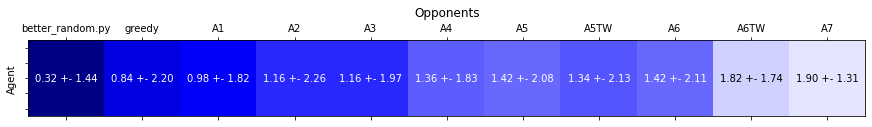

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow([single_point_estimate], cmap='seismic', vmin=0, vmax=4)

ax.set_title("Opponents")
ax.set_ylabel("Agent")

for (i, j), z in np.ndenumerate([single_point_estimate]):
    ax.text(j, i, f"{single_point_estimate[j]:.2f} +- {1.96 * single_std_dev[j]:.2f}", color="black" if abs(single_point_estimate[j] - 2) < 0.5 else "white", ha='center', va='center')

ax.set_xticks(range(len(single_point_estimate)))
ax.set_xticklabels(tournament_labels)
ax.set_yticklabels([single_agent])

plt.show()


In [6]:
import main

main.agent

import better_random
better_random.agent(None, None)

'NORTH'

In [7]:
from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Action
import numpy as np

env = make("hungry_geese", debug=False)

trainer = env.train([None, "greedy", "greedy", "greedy"])
possible_moves = [Action.NORTH.name, Action.EAST.name, Action.SOUTH.name, Action.WEST.name]

obs = []
observation = trainer.reset()
obs.append(observation)

done = False
while not done:
    action = np.random.choice(possible_moves)
    
    observation, reward, done, info = trainer.step(action)
    obs.append(observation)


In [8]:
import matplotlib.pyplot as plt
import numpy as np

from DQN.model import Model
from shared.memory_manager import MemoryManager
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration
from kaggle_environments.envs.hungry_geese.hungry_geese import row_col

from shared.map import Map


memory_manager = MemoryManager(-1, 0.99)
memory_manager.add_memory([obs[-3], 1, 1, 1, 3, 0, obs[-2]], 1)

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

trans_obs = memory_manager.last_episode[0][0]
map = Map(trans_obs, 11)
data = map.build_opponent_map(1).reshape(7,11)
data = map.build_opponent_map(0).reshape(7,11)

original = np.zeros(77)
original[map.player_head] = 5
for i in range(4):
    if i != trans_obs["index"]:
        if len(trans_obs["geese"][i]) != 0:
            original[trans_obs["geese"][i][0]] = i
            
            for j in range(1, len(map.geese[i])):
                original[trans_obs["geese"][i][j]] = i - 0.5



data = original.reshape(7,11)

fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

transformed = np.zeros(77)
transformed[map.geese[map.player_index][0]] = 5
for i in range(4):
    if i != trans_obs["index"]:
        if len(map.geese[i]) != 0:
            transformed[map.geese[i][0]] = i
        
            for j in range(1, len(map.geese[i])):
                transformed[map.geese[i][j]] = i - 0.5


transformed = np.zeros(77)
data = transformed.reshape(7,11)

data[map.translate(map.player_head)] = 5
print("Head", map.player_head, map.translate(map.player_head))
for i in range(4):
    if i != trans_obs["index"]:
        if len(trans_obs["geese"][i]) != 0:
            data[map.translate(trans_obs["geese"][i][0])] = i
            print("translated", trans_obs["geese"][i][0], map.translate(trans_obs["geese"][i][0]))
            
            for j in range(1, len(map.geese[i])):
                data[map.translate(trans_obs["geese"][i][j])] = i - 0.5
                print("translated", trans_obs["geese"][i][0], map.translate(trans_obs["geese"][i][j]))



fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()


print(trans_obs)


TypeError: add_memory() missing 1 required positional argument: 'mc_reward'